In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# load dataset
data_dir = './input'
data = pd.read_csv(f'{data_dir}/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# drop id, it is just a number given to identify each house
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

The house price dataset contains 1460 rows, that is, houses, and 80 columns, i.e., features.

79 are predictive features and the target variable is `SalePrice`.

We will analyse the following:

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    * Discrete
    * Continuous
    * Distributions
    * Transformations
5. Categorical variables
    * Cardinality
    * Rare Labels
    * Special mappings
6. Additional Reading Resources

## Target Variable: SalePrice

Text(0, 0.5, 'The number of sales')

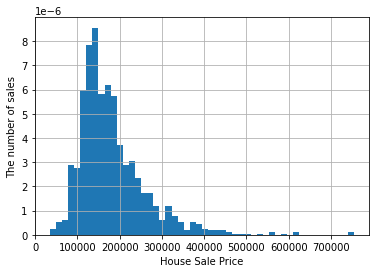

In [6]:
data['SalePrice'].hist(bins=50, density=True)
plt.xlabel('House Sale Price')
plt.ylabel('The number of sales')

We can see that the target is continuous, and the distribution is skewed towards the right.

We can improve the value spread with a mathematical transformation.

Text(0.5, 1.0, 'Sale Price After Transformation')

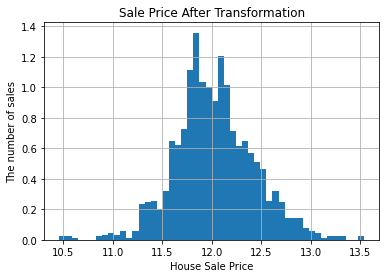

In [7]:
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.xlabel('House Sale Price')
plt.ylabel('The number of sales')
plt.title('Sale Price After Transformation')

## Variable Types

Next, let's identify the catergorical and numerical variables.

In [8]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# MSSubClass is also categorical by definition, despite its numeric values

# lets add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

# number of categorical variables
len(cat_vars)

44

In [9]:
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')

In [10]:
# now let's identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# number of numerical variables
len(num_vars)

35

## Missing Values
Let's go ahead and find out which variables of the dataset contain missing values.

In [15]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

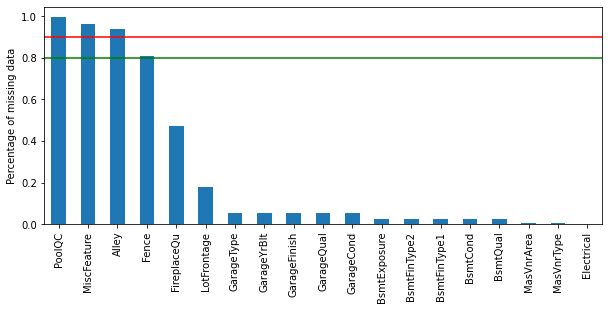

In [16]:
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

## Relationship between missing data and Sale Price

Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [20]:
def evaluate_na_value(df, var):
    df_copy = df.copy()
    df_copy[var] = np.where(df_copy[var].isnull(), 1, 0)

    tmp = df_copy.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", xerr="std", title="Sale Price", color='red', legend=False)

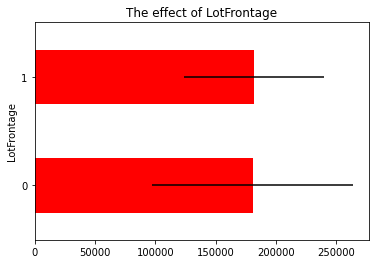

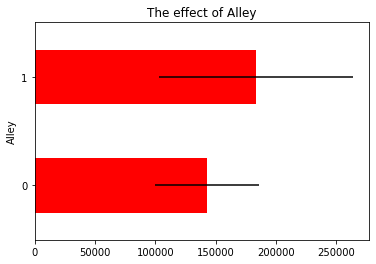

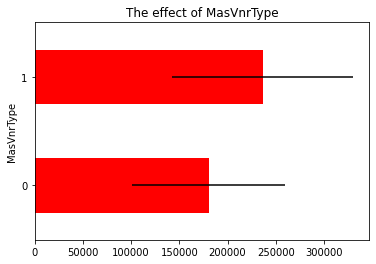

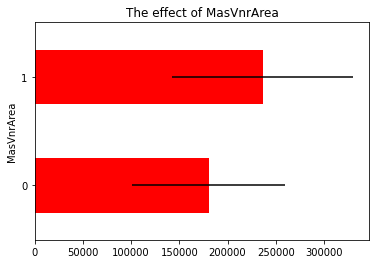

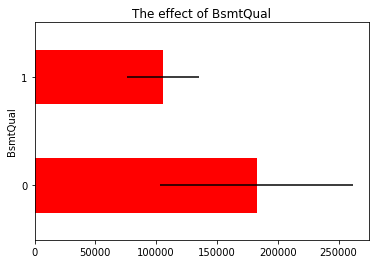

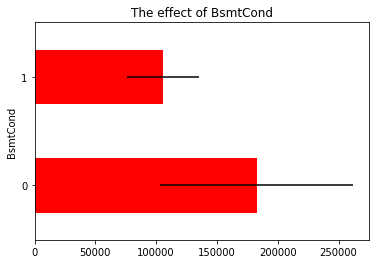

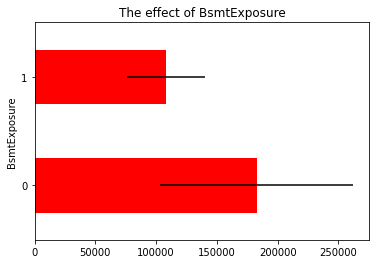

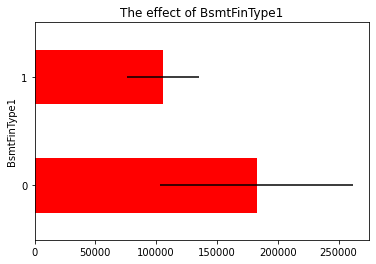

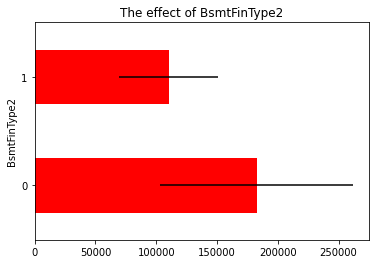

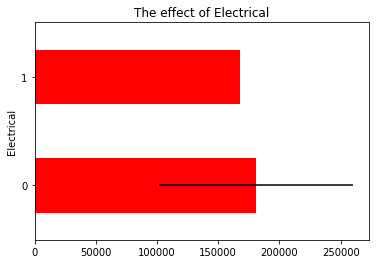

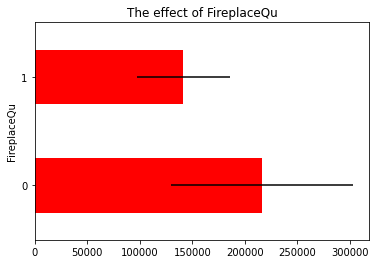

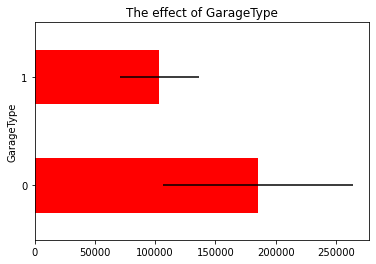

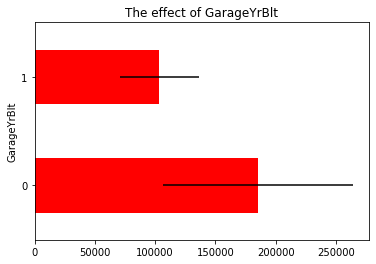

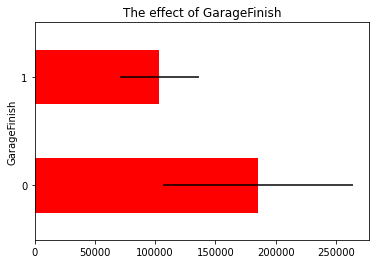

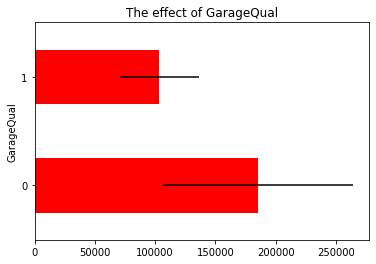

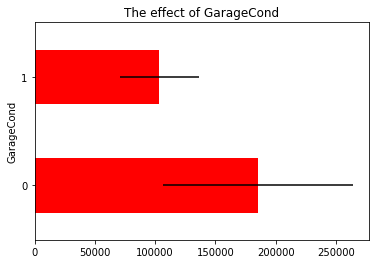

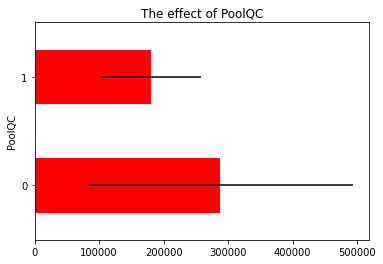

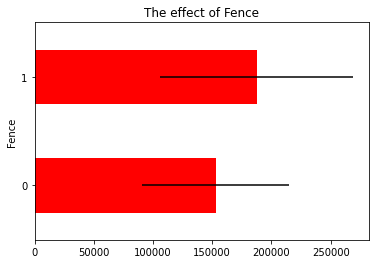

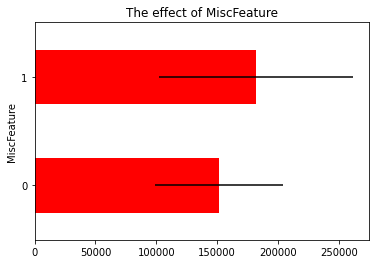

In [22]:
for var in vars_with_na:
    evaluate_na_value(data, var)
    plt.title(f'The effect of {var}')